# Heart Disease Prediction Using UCI Data_Set

# About Dataset


**Context**


This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

**Column Descriptions:**




1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
 Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute



## Importing Libraries

In [18]:
#Data wrangling & pre-processing
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

#Handling the missing values
import missingno as msno

import xgboost as xgb

#import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler


## Loading the DataSet

In [19]:
# reading heart disease dataset
heart_disease_data = pd.read_csv('./heart_disease_uci.csv')

In [20]:
#top 5 rows in the dataset
heart_disease_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [21]:
#last 5 rows in the dataset
heart_disease_data.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


## Exploratory Data Analysis

### **Preview the Data**

In [22]:
#getting some info about the dataset
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [23]:
heart_disease_data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [24]:
#number of rows and counmns to the dataset
heart_disease_data.shape

(920, 16)

In [25]:
#checking the missing values
heart_disease_data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


So  we can see that we have missing values in some columns.Let see what are the titles with missing values.

In [26]:
heart_disease_data.dtypes

,0
id,int64
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64


Generate statistical summaries for numerical columns.

### **Checking the distribution of numerical variables**

In [27]:
# Descriptive statistics for numerical columns
print("Statistical Summary:")
print(heart_disease_data.describe())

Statistical Summary:
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.00

Distribution and Boxplot for age:


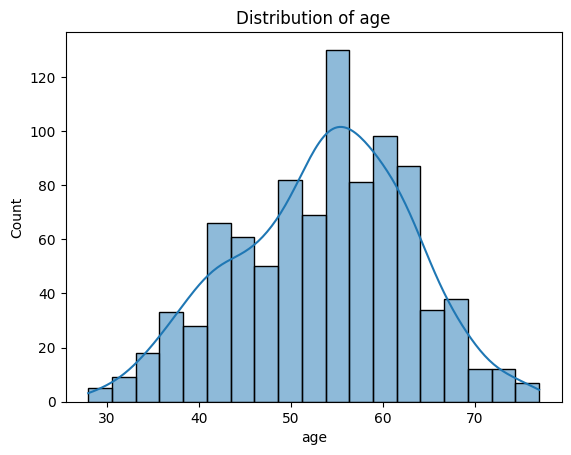

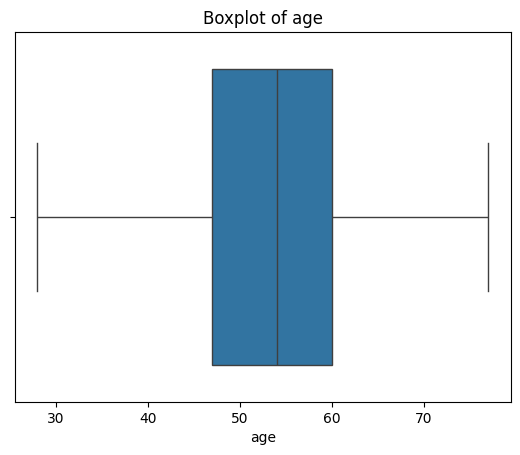

Distribution and Boxplot for trestbps:


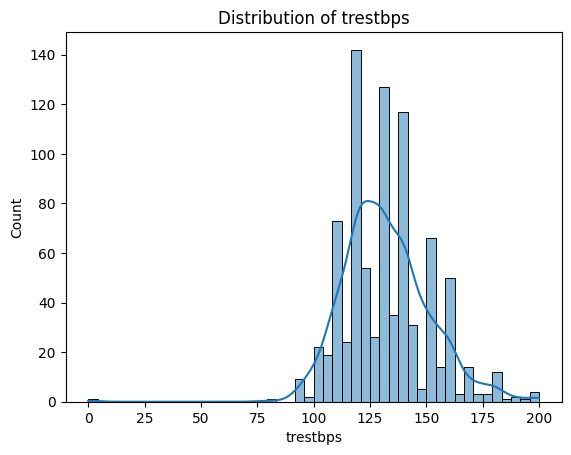

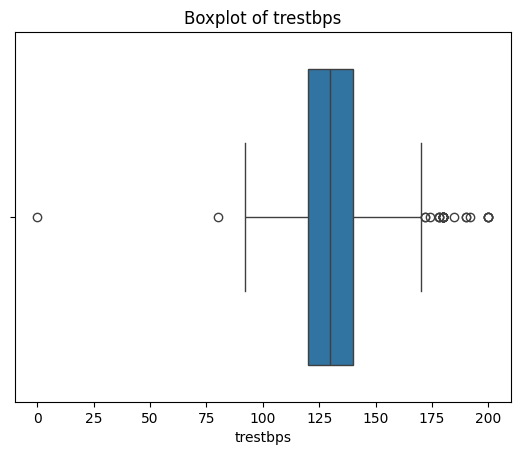

Distribution and Boxplot for chol:


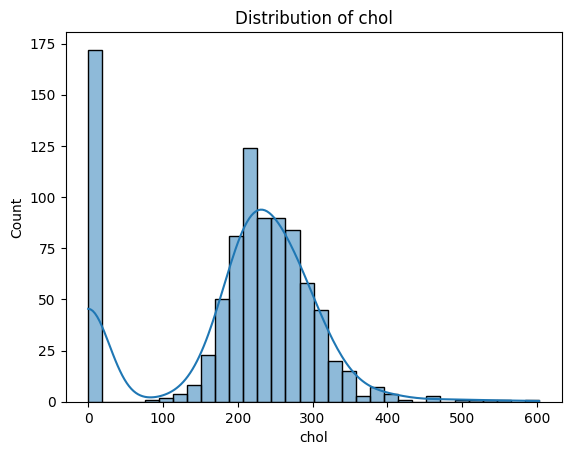

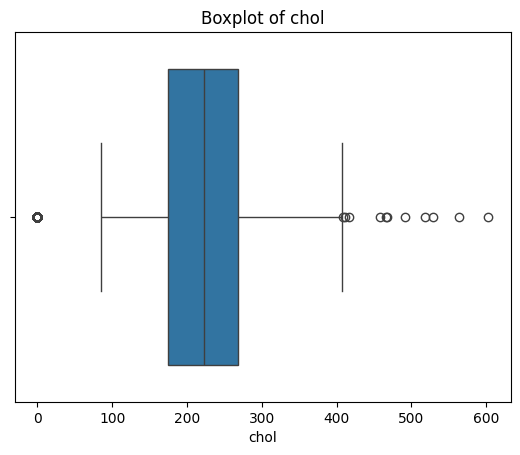

Distribution and Boxplot for thalch:


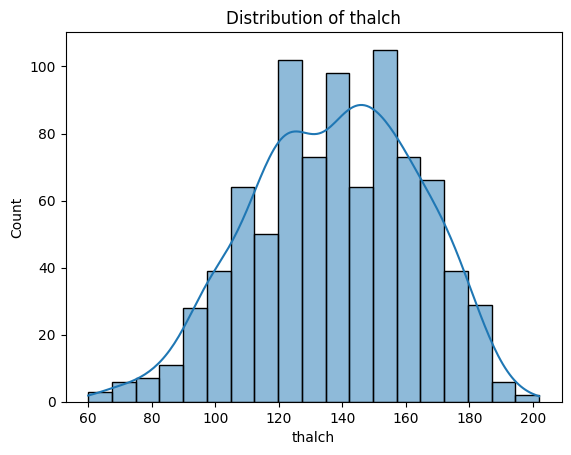

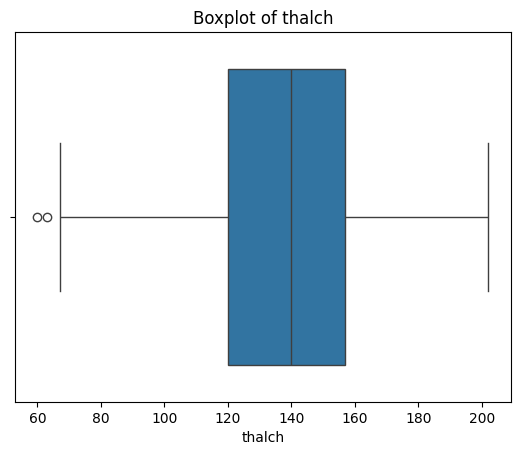

Distribution and Boxplot for oldpeak:


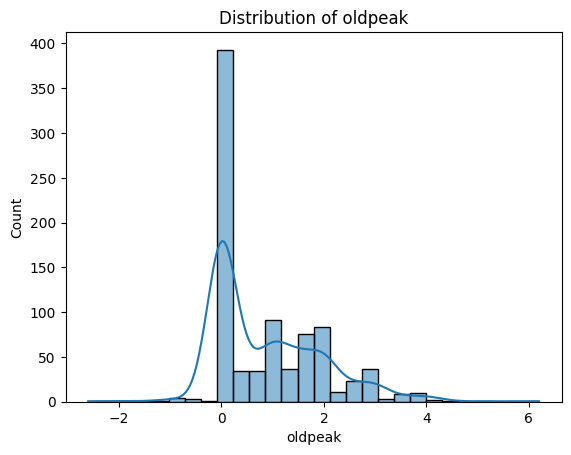

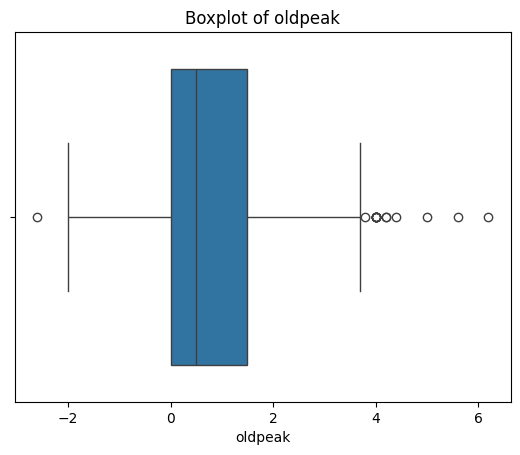

Distribution and Boxplot for ca:


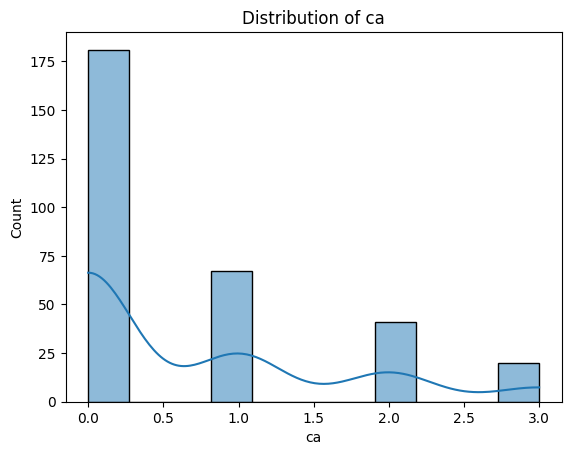

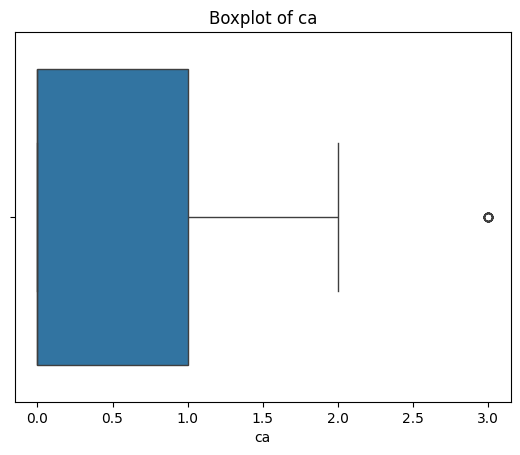

In [28]:
# Plotting numerical variable distributions
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak','ca']

for col in numerical_columns:
    print(f"Distribution and Boxplot for {col}:")
    sns.histplot(heart_disease_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    sns.boxplot(x=heart_disease_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### **Checking the distribution of categorical variables**

Checking the distribution of categorical variables helps to understand the frequency of categories, identify any imbalances

In [29]:
# List of categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Loop through each categorical column to check distributions
for column in categorical_columns:
    print(f"Distribution of {column}:\n")
    print(heart_disease_data[column].value_counts())
    print("\n")

Distribution of sex:

sex
Male      726
Female    194
Name: count, dtype: int64


Distribution of cp:

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


Distribution of fbs:

fbs
False    692
True     138
Name: count, dtype: int64


Distribution of restecg:

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


Distribution of exang:

exang
False    528
True     337
Name: count, dtype: int64


Distribution of slope:

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64


Distribution of thal:

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64




Unique values in sex:
sex
Male      726
Female    194
Name: count, dtype: int64


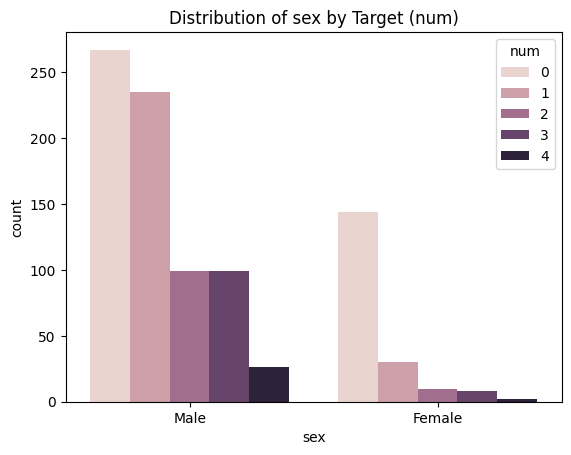

Unique values in cp:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


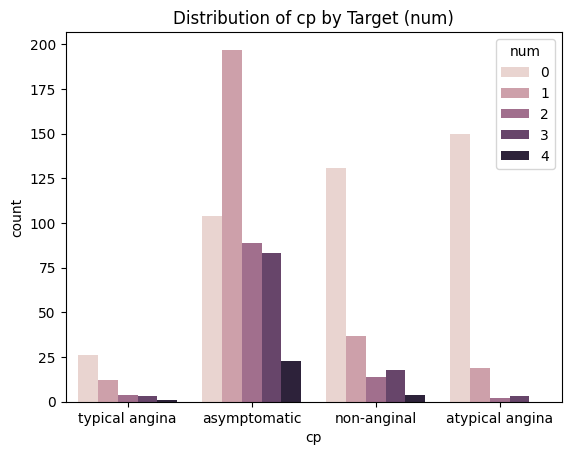

Unique values in fbs:
fbs
False    692
True     138
Name: count, dtype: int64


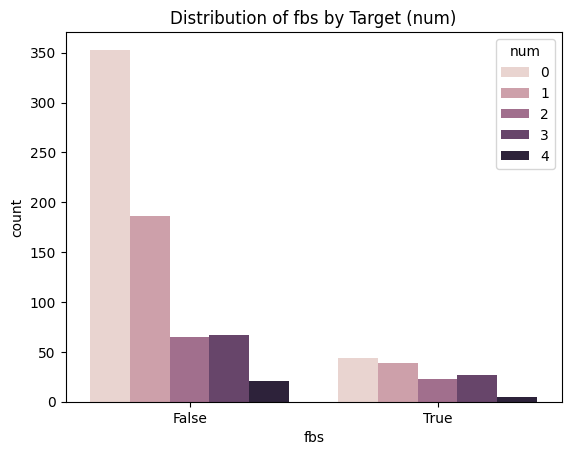

Unique values in restecg:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


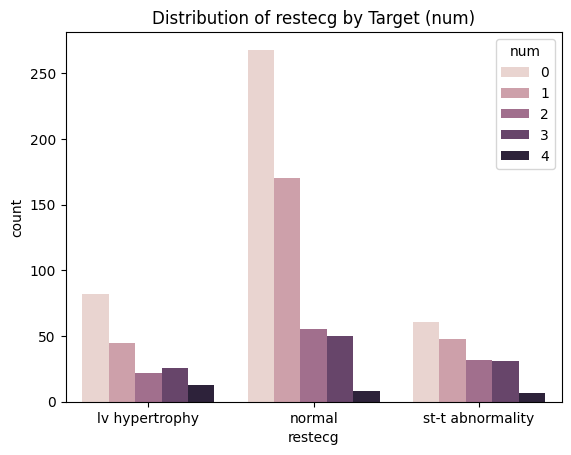

Unique values in exang:
exang
False    528
True     337
Name: count, dtype: int64


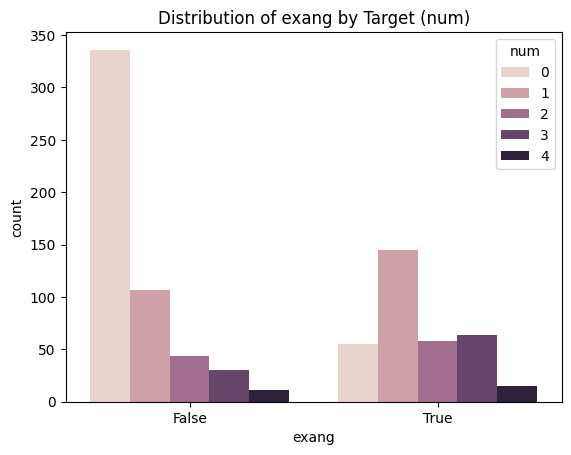

Unique values in slope:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64


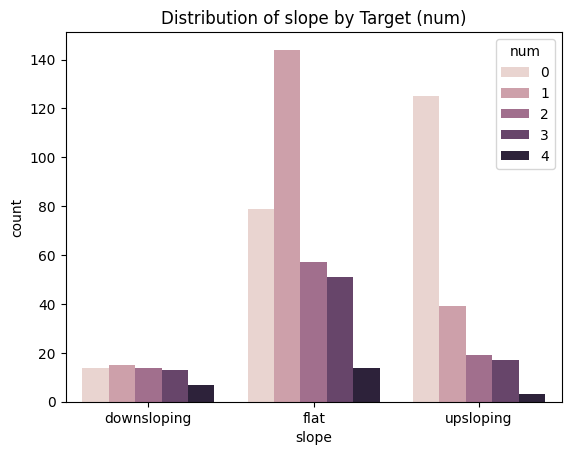

Unique values in thal:
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


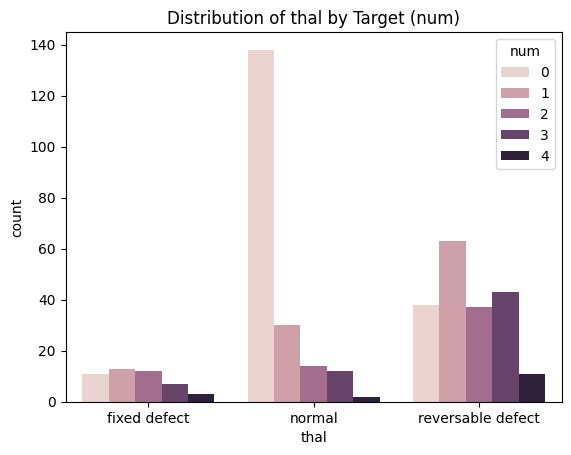

In [30]:
# Unique values and frequency for categorical variables
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(heart_disease_data[col].value_counts())
    sns.countplot(data=heart_disease_data, x=col, hue='num')
    plt.title(f"Distribution of {col} by Target (num)")
    plt.show()

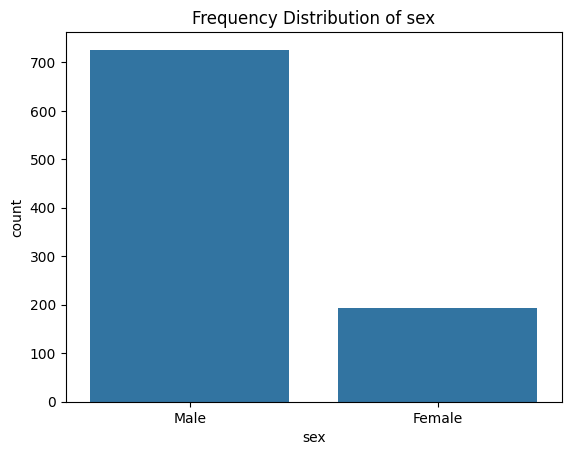

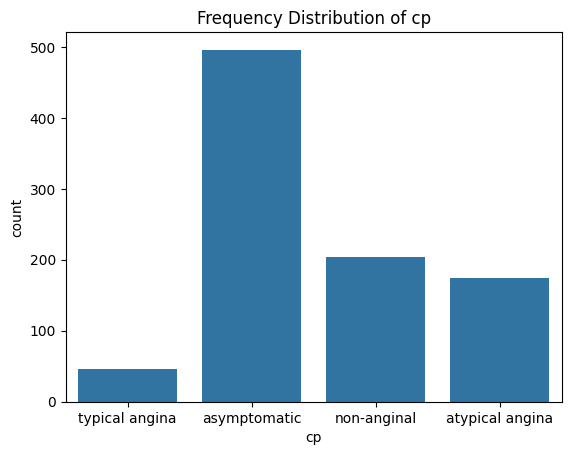

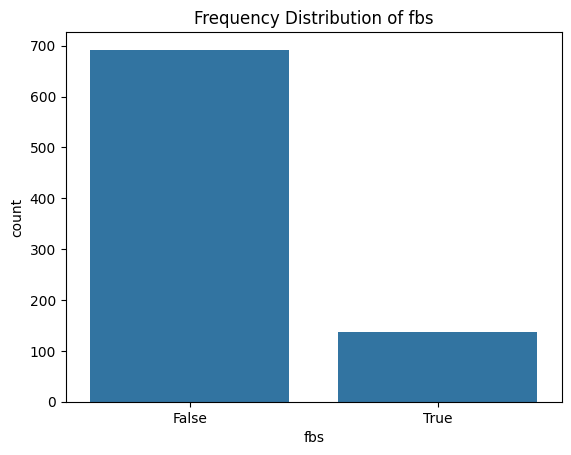

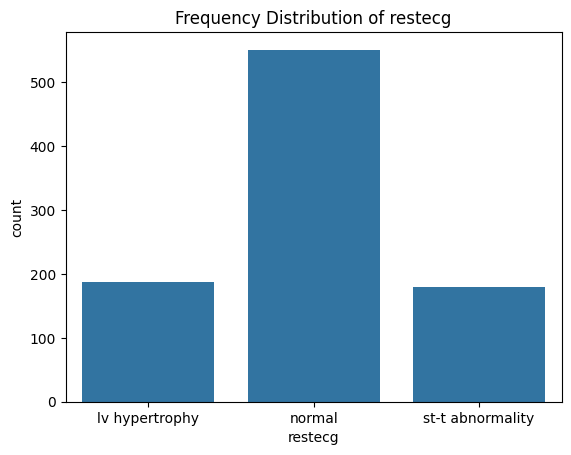

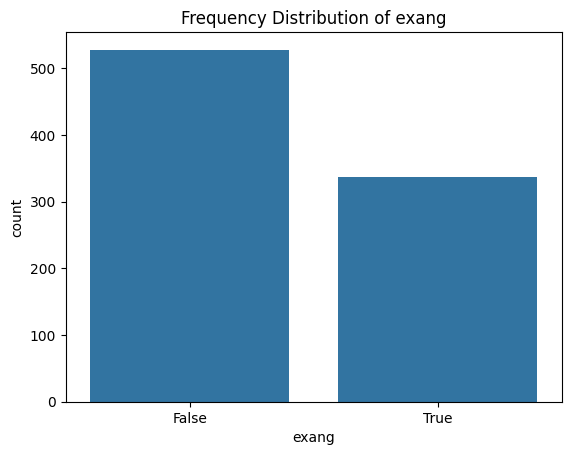

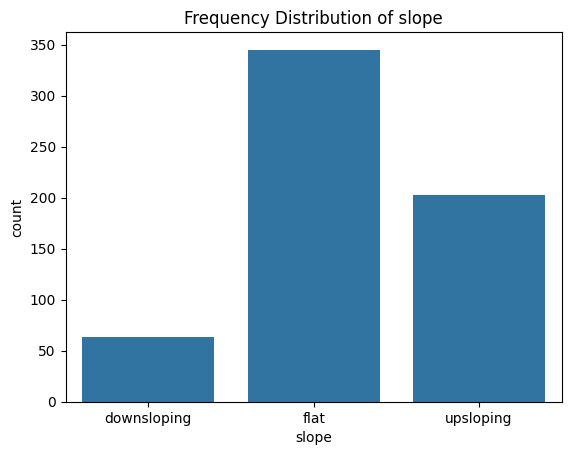

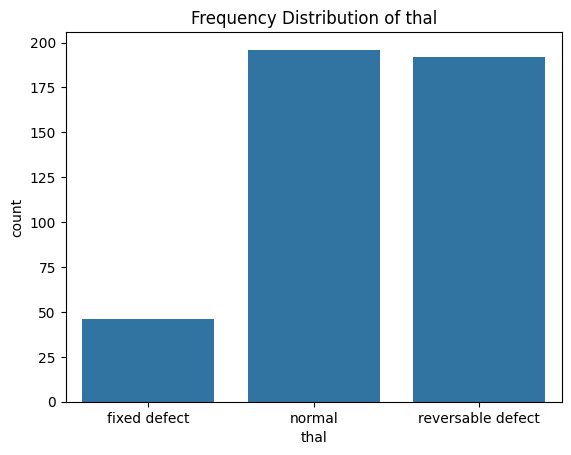

In [31]:
 # Visualize distribution
 for column in categorical_columns:
    sns.countplot(x=column, data=heart_disease_data)
    plt.title(f"Frequency Distribution of {column}")
    plt.show()



---







Let't Handle the outliers in the numerical columns.

## Handling Outliers


Check the variable which have outliers in the data.

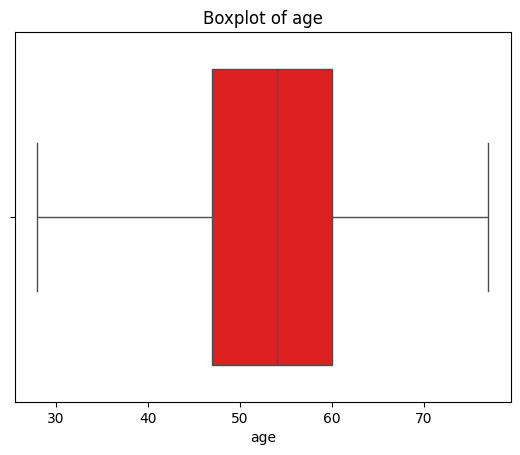

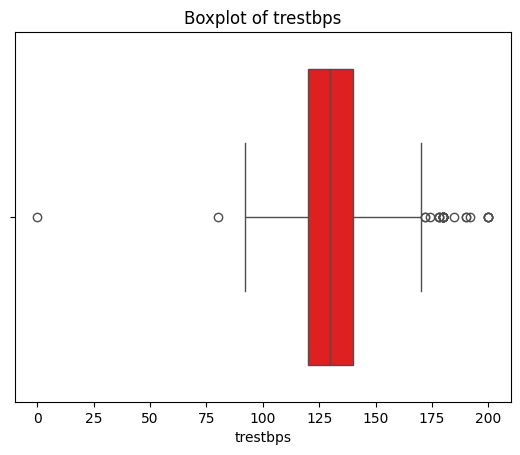

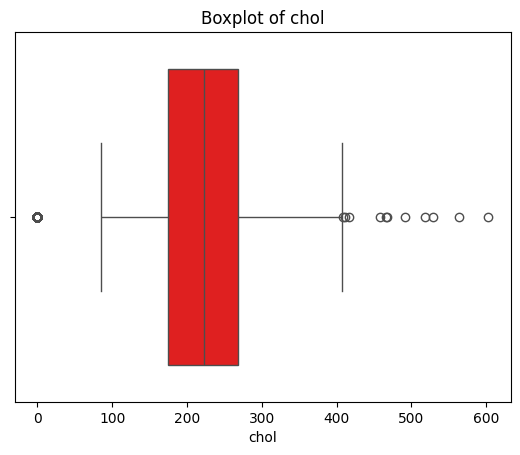

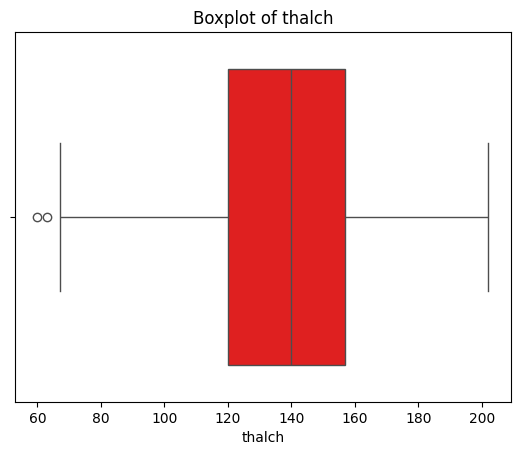

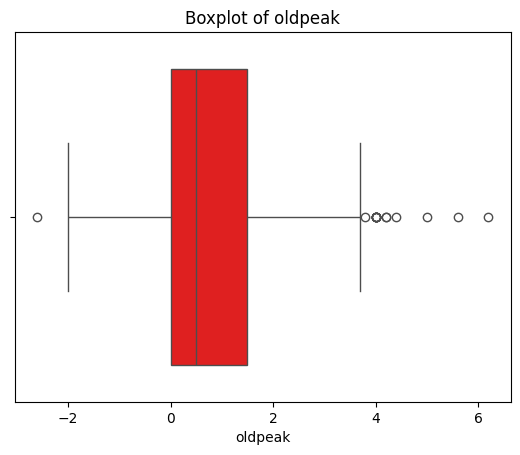

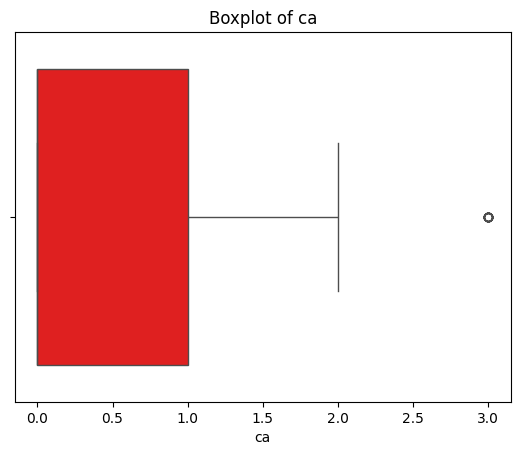

In [17]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak','ca']

for col in numerical_columns:
  sns.boxplot(x=heart_disease_data[col] , color='red')
  plt.title(f"Boxplot of {col}")
  plt.show()

These boxplts show the outliers values. Now we have to find out whether these are actually outliers that will ruin our dataset or these are extreme values that will help us in generating new hypotheses.

In here the 'trestbps' , 'chol' , 'oldpeak' , 'thalch' and 'ca' have the outliers in the dataset.

Amoung them 'trestbps' and 'chol' have the more outliers than other variables.'oldpeak' , 'thalch' and 'ca' have very few number of outliers. So we can ignore that columns and we only dealing with the 'trestbps' and 'chol' varables.

In 'trestbps' column, minimun outlier is 0, and 'chol' columns is also like that. So let explore these outliers.

In [32]:
heart_disease_data[heart_disease_data['trestbps'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,3


In [33]:
heart_disease_data[heart_disease_data['chol'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.0,0.0,NaN,normal,127.0,False,0.7,upsloping,NaN,NaN,1
598,599,34,Male,Switzerland,asymptomatic,115.0,0.0,NaN,NaN,154.0,False,0.2,upsloping,NaN,NaN,1
599,600,35,Male,Switzerland,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.0,0.0,NaN,normal,125.0,True,1.0,flat,NaN,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.0,0.0,NaN,normal,166.0,False,2.8,upsloping,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.0,0.0,False,normal,120.0,False,0.5,upsloping,NaN,NaN,1
819,820,63,Male,VA Long Beach,non-anginal,130.0,0.0,True,st-t abnormality,160.0,False,3.0,flat,NaN,NaN,0
822,823,48,Male,VA Long Beach,non-anginal,102.0,0.0,NaN,st-t abnormality,110.0,True,1.0,downsloping,NaN,NaN,1
839,840,56,Male,VA Long Beach,asymptomatic,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1




*    Normal human **blood pressure**  typically(**thresbps**)
 falls within the range of 90/60 mmHg to 120/80 mmHg.So a value of 0 for 'tresbps' is impossible and indicates an error in data collection or recording.
Then it is as **outlier**.






*   Typical **cholesterol(chol)** levels of people are between 125 to 200 mg/dL.A cholesterol value of 0.0 is not possible in a living person.So it is also indicated the missing or incorrectly recorded data.
Then it is also an **outlier**.



In [34]:
# Dropping rows where 'trestbps' or 'chol' are 0
heart_disease_data = heart_disease_data[heart_disease_data['trestbps'] != 0]

In [35]:
#Drop the row where chol is 0
heart_disease_data = heart_disease_data[heart_disease_data['chol'] != 0]

In [36]:
#check the row where chol is 0
heart_disease_data[heart_disease_data['chol'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


In [37]:
#check the data set info
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        748 non-null    int64  
 1   age       748 non-null    int64  
 2   sex       748 non-null    object 
 3   dataset   748 non-null    object 
 4   cp        748 non-null    object 
 5   trestbps  702 non-null    float64
 6   chol      718 non-null    float64
 7   fbs       738 non-null    object 
 8   restecg   747 non-null    object 
 9   thalch    703 non-null    float64
 10  exang     703 non-null    object 
 11  oldpeak   701 non-null    float64
 12  slope     475 non-null    object 
 13  ca        303 non-null    float64
 14  thal      353 non-null    object 
 15  num       748 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 99.3+ KB


### Function for outlier treatment using the z-score

In [38]:
#define a function
def treat_outliers_z_score(heart_disease_data, col):
    # Calculate the z-scores for the column
    z_scores = np.abs((heart_disease_data[col] - heart_disease_data[col].mean()) / heart_disease_data[col].std())

    threshold = 3

    # Identify outliers using a boolean mask
    outlier_mask = (z_scores > threshold)

    print(f"Number of outliers in '{col}': {outlier_mask.sum()}")

    # Filter the DataFrame using the mask
    heart_disease_data = heart_disease_data[~outlier_mask]

    print('Z score outlier treatment done on {}.'.format(col))
    return heart_disease_data


Applying outlier_treatment function on trestbps

In [39]:
heart_disease_data = treat_outliers_z_score(heart_disease_data, 'trestbps')

Number of outliers in 'trestbps': 5
Z score outlier treatment done on trestbps.


Applying outlier_treatment function on chol

In [40]:
heart_disease_data = treat_outliers_z_score(heart_disease_data, 'chol')

Number of outliers in 'chol': 8
Z score outlier treatment done on chol.


In [41]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        735 non-null    int64  
 1   age       735 non-null    int64  
 2   sex       735 non-null    object 
 3   dataset   735 non-null    object 
 4   cp        735 non-null    object 
 5   trestbps  689 non-null    float64
 6   chol      705 non-null    float64
 7   fbs       727 non-null    object 
 8   restecg   734 non-null    object 
 9   thalch    690 non-null    float64
 10  exang     690 non-null    object 
 11  oldpeak   688 non-null    float64
 12  slope     467 non-null    object 
 13  ca        300 non-null    float64
 14  thal      349 non-null    object 
 15  num       735 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 97.6+ KB


**ID Column**

In [42]:
heart_disease_data['id'].min(), heart_disease_data['id'].max()

(1, 920)

ID is a unique identifier for each patient.It is not usefull for our data analysis.

**Age Column**

In [43]:
heart_disease_data['age'].min(), heart_disease_data['age'].max()

(28, 77)

Maximum age of people is 77 years.

Text(0.5, 1.0, 'Age Distribution')

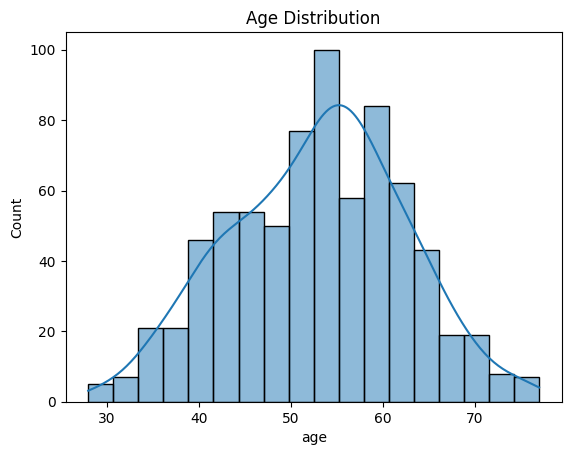

In [44]:
#histogram to see the distribution of age
sns.histplot(heart_disease_data['age'], kde=True)
plt.title('Age Distribution')

In [45]:
#histogram to see the distribution of gender on age using plotly
fig = px.histogram(heart_disease_data, x='age', color='sex')
fig.show()

**Sex Column**

In [ ]:
#value counts of gender
heart_disease_data['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

**Dataset Column**

In [ ]:
#dataset column
heart_disease_data['dataset'].unique()


array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [ ]:
#counts of the dataset
heart_disease_data['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [46]:
# Create a bar chart with counts
fig = px.bar(heart_disease_data, x='dataset', color='sex', barmode='group')
fig.show()

**CP (Chest Pain) Column**

In [ ]:
#value counts of chest pain column
heart_disease_data['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

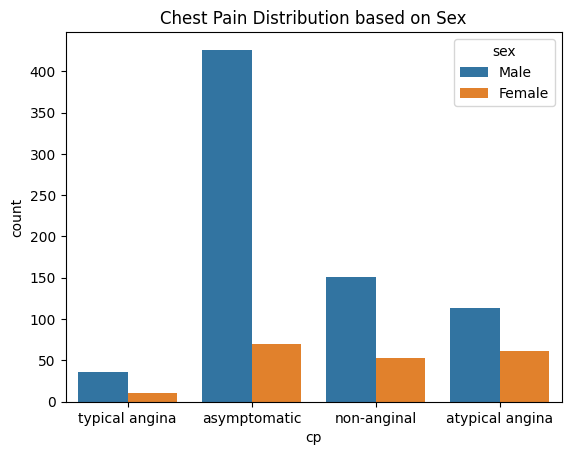

In [ ]:
#plot the cp column using sns
sns.countplot(data=heart_disease_data, x='cp', hue='sex')
plt.title('Chest Pain Distribution based on Sex')
plt.show()

So, the other columns have missing values.Next we'll deal with the missing values in the data set.

## Handling Missing Values

In [47]:
#checking sum of the missing values
heart_disease_data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,46
chol,30
fbs,8
restecg,1
thalch,45


In [48]:
#checking the columns names of containing missing values
for col in heart_disease_data.columns:
   if heart_disease_data[col].isnull().any():
    print(col)

trestbps
chol
fbs
restecg
thalch
exang
oldpeak
slope
ca
thal


So, we have missing values in the following variables:

*   trestbps
*   cho
*   fbs
*   restecg
*   thalch
*   exang
*   oldepak
*   slope
*   ca
*   thal



### **Visualizing the Missing Values patterns**

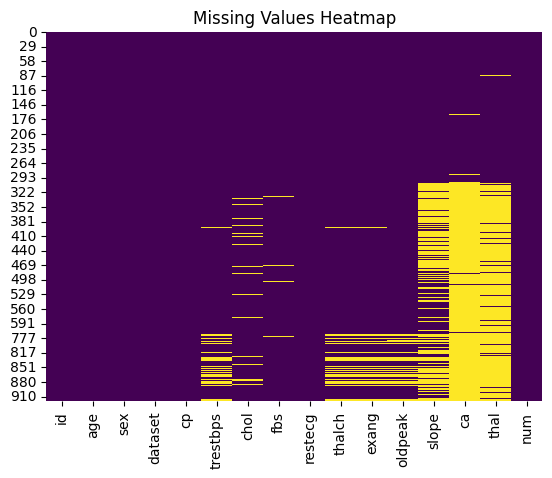

In [49]:
# Heatmap to visualize missing data
sns.heatmap(heart_disease_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

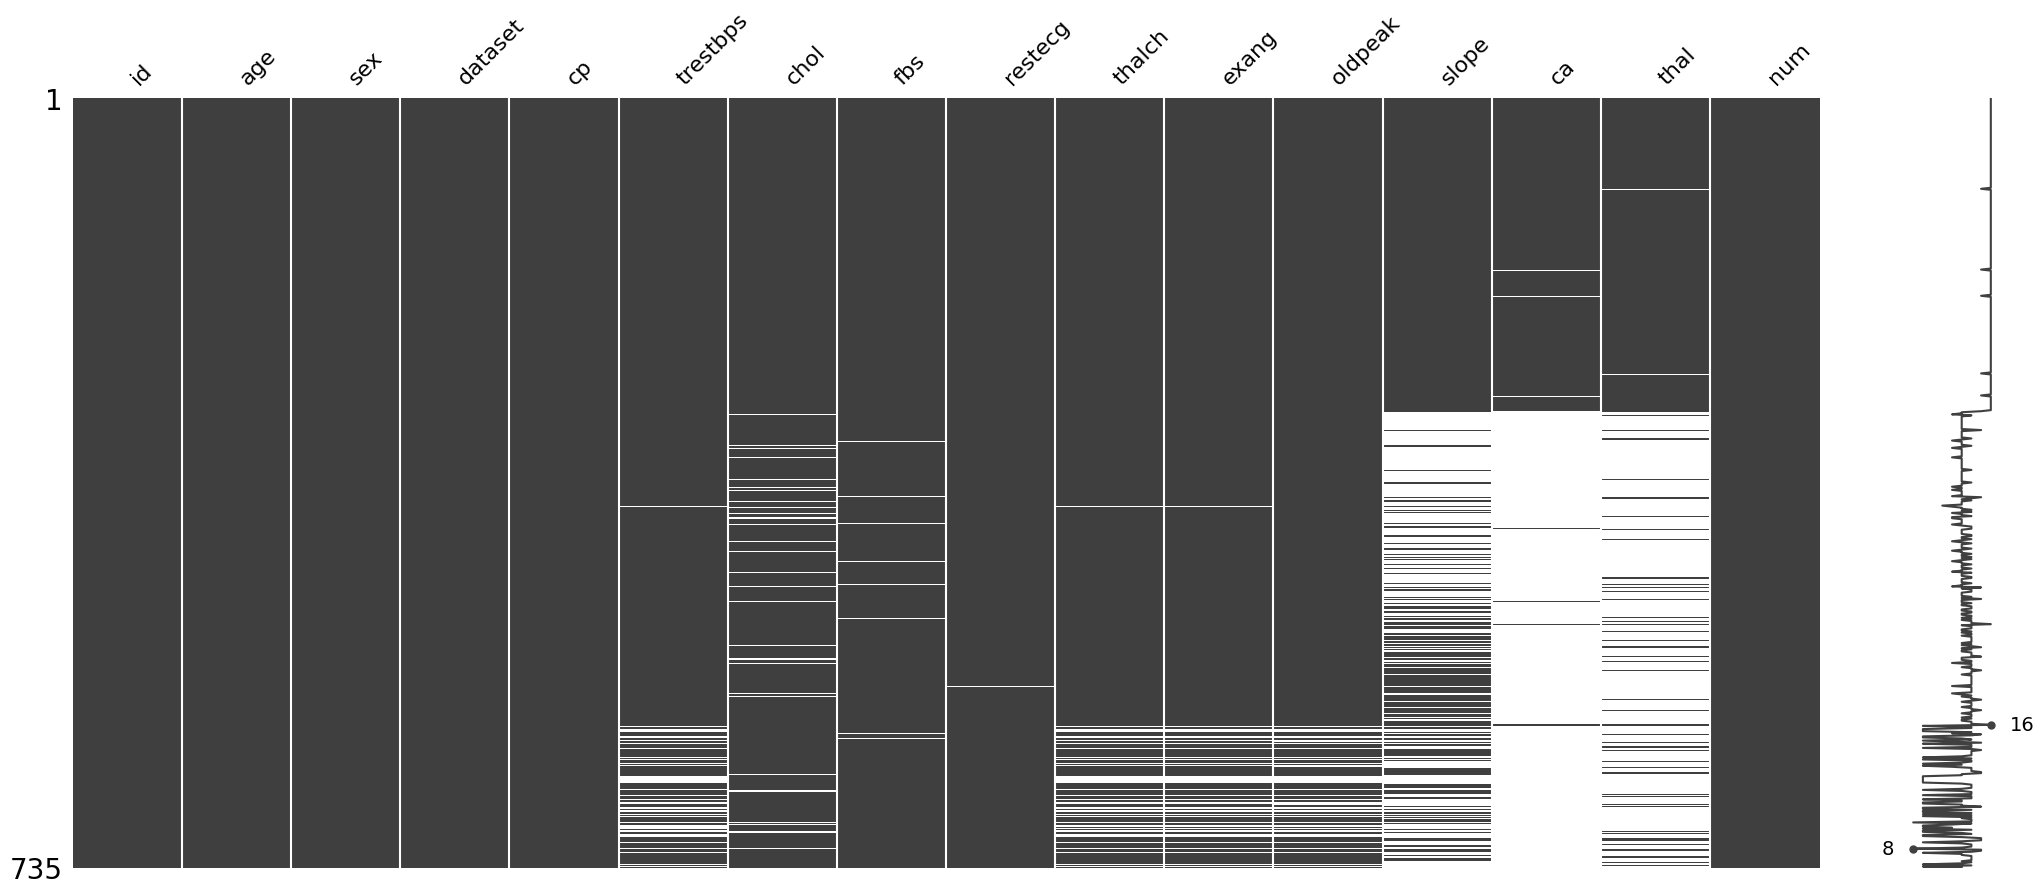

In [50]:
# Visualize missing data uisng
msno.matrix(heart_disease_data)
plt.show()

In [52]:
#percentage of missing values
for col in heart_disease_data.columns:
    if heart_disease_data[col].isnull().any():
        missing_count = heart_disease_data[col].isnull().sum()
        total_count = len(heart_disease_data[col])
        missing_percentage = (missing_count / total_count) * 100
        print(f'The missing percentage in "{col}" are: {missing_count} ({missing_percentage:.2f}%)')


The missing percentage in "trestbps" are: 46 (6.26%)
The missing percentage in "chol" are: 30 (4.08%)
The missing percentage in "fbs" are: 8 (1.09%)
The missing percentage in "restecg" are: 1 (0.14%)
The missing percentage in "thalch" are: 45 (6.12%)
The missing percentage in "exang" are: 45 (6.12%)
The missing percentage in "oldpeak" are: 47 (6.39%)
The missing percentage in "slope" are: 268 (36.46%)
The missing percentage in "ca" are: 435 (59.18%)
The missing percentage in "thal" are: 386 (52.52%)


### **Handling Missing values**

Let's divide variables as numerical and categorical.

In [53]:
#  columns with missing values
missing_columns = heart_disease_data.columns[heart_disease_data.isnull().any()]

# Separate into categorical and numerical columns
categorical_missing = [col for col in missing_columns if heart_disease_data[col].dtypes == 'object']
numerical_missing = [col for col in missing_columns if heart_disease_data[col].dtypes in ['int64', 'float64']]

# Print results
print("Categorical columns with missing values:")
print(categorical_missing)

print("\nNumerical columns with missing values:")
print(numerical_missing)


Categorical columns with missing values:
['fbs', 'restecg', 'exang', 'slope', 'thal']

Numerical columns with missing values:
['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']


So the ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca'] columns have numeric type. We can impute the missing values by  IterativeImputer to theses numeric variables which os best with the missing values.

### Handling Missing Values in Numerical Variables

In [54]:
#impute missing values by iterative imputer
imputer_1 = IterativeImputer(max_iter=10,random_state=42)
heart_disease_data[numerical_missing] = imputer_1.fit_transform(heart_disease_data[numerical_missing])


In [55]:
#checking the missing values are imputed or not
for col in heart_disease_data.columns:
    if heart_disease_data[col].isnull().any():
        print(f'The missing values in "{col}" variable are: {heart_disease_data[col].isnull().sum()}')

The missing values in "fbs" variable are: 8
The missing values in "restecg" variable are: 1
The missing values in "exang" variable are: 45
The missing values in "slope" variable are: 268
The missing values in "thal" variable are: 386


So, now all the numeric values are imputed and we have only 5 categical varibles with missing values.

### Handling Missing Values in Categorical Variables

In [56]:
heart_disease_data[categorical_missing].value_counts()

fbs    restecg           exang  slope        thal             
False  normal            False  upsloping    normal               50
       lv hypertrophy    False  upsloping    normal               29
       normal            True   flat         reversable defect    24
       lv hypertrophy    False  flat         normal               18
                                             reversable defect    17
       normal            False  flat         normal               17
       lv hypertrophy    True   flat         reversable defect    16
       normal            False  upsloping    reversable defect    11
                                flat         reversable defect    10
       lv hypertrophy    True   flat         normal               10
True   lv hypertrophy    False  upsloping    normal                7
False  normal            True   upsloping    reversable defect     7
       lv hypertrophy    True   upsloping    normal                6
                                             reversable defect     6
       normal            True   flat         normal                6
       lv hypertrophy    False  upsloping    reversable defect     6
True   normal            False  upsloping    normal                5
False  normal            True   upsloping    normal                4
True   normal            False  flat         reversable defect     4
False  normal            True   flat         fixed defect          4
True   normal            False  upsloping    reversable defect     4
       lv hypertrophy    False  flat         normal                3
False  normal            False  downsloping  normal                3
                                flat         fixed defect          3
True   lv hypertrophy    True   flat         reversable defect     3
                                downsloping  reversable defect     2
                                flat         fixed defect          2
False  st-t abnormality  True   flat         normal                2
True   lv hypertrophy    True   upsloping    reversable defect     2
False  st-t abnormality  True   flat         reversable defect     2
       lv hypertrophy    False  downsloping  normal                2
                         True   flat         fixed defect          2
                         False  downsloping  reversable defect     2
                                flat         fixed defect          2
                                upsloping    fixed defect          2
                         True   downsloping  normal                2
       normal            True   downsloping  reversable defect     2
       lv hypertrophy    True   downsloping  reversable defect     2
       st-t abnormality  False  flat         normal                1
True   normal            True   flat         reversable defect     1
                                             normal                1
                                downsloping  reversable defect     1
                         False  flat         normal                1
                                             fixed defect          1
                                downsloping  reversable defect     1
       lv hypertrophy    True   upsloping    normal                1
                                flat         normal                1
False  st-t abnormality  True   downsloping  fixed defect          1
       normal            False  downsloping  reversable defect     1
                         True   downsloping  fixed defect          1
True   lv hypertrophy    False  flat         reversable defect     1
False  normal            True   upsloping    fixed defect          1
True   lv hypertrophy    False  flat         fixed defect          1
                                downsloping  normal                1
                                             fixed defect          1
False  st-t abnormality  True   upsloping    reversable defect     1
                         False  downsloping  fixed defect          1
    

In [58]:
#percentage of categorical missing values

for col in categorical_missing:
    missing_count = heart_disease_data[col].isnull().sum()
    total_count = len(heart_disease_data[col])
    missing_percentage = (missing_count / total_count) * 100
    print(f'The missing percentage in "{col}" is: {missing_count} ({missing_percentage:.2f}%)')


The missing percentage in "fbs" is: 8 (1.09%)
The missing percentage in "restecg" is: 1 (0.14%)
The missing percentage in "exang" is: 45 (6.12%)
The missing percentage in "slope" is: 268 (36.46%)
The missing percentage in "thal" is: 386 (52.52%)


From this percantages 'thal'(Thalassemia) - has the larget number of the percantage. So as first deal with that value.

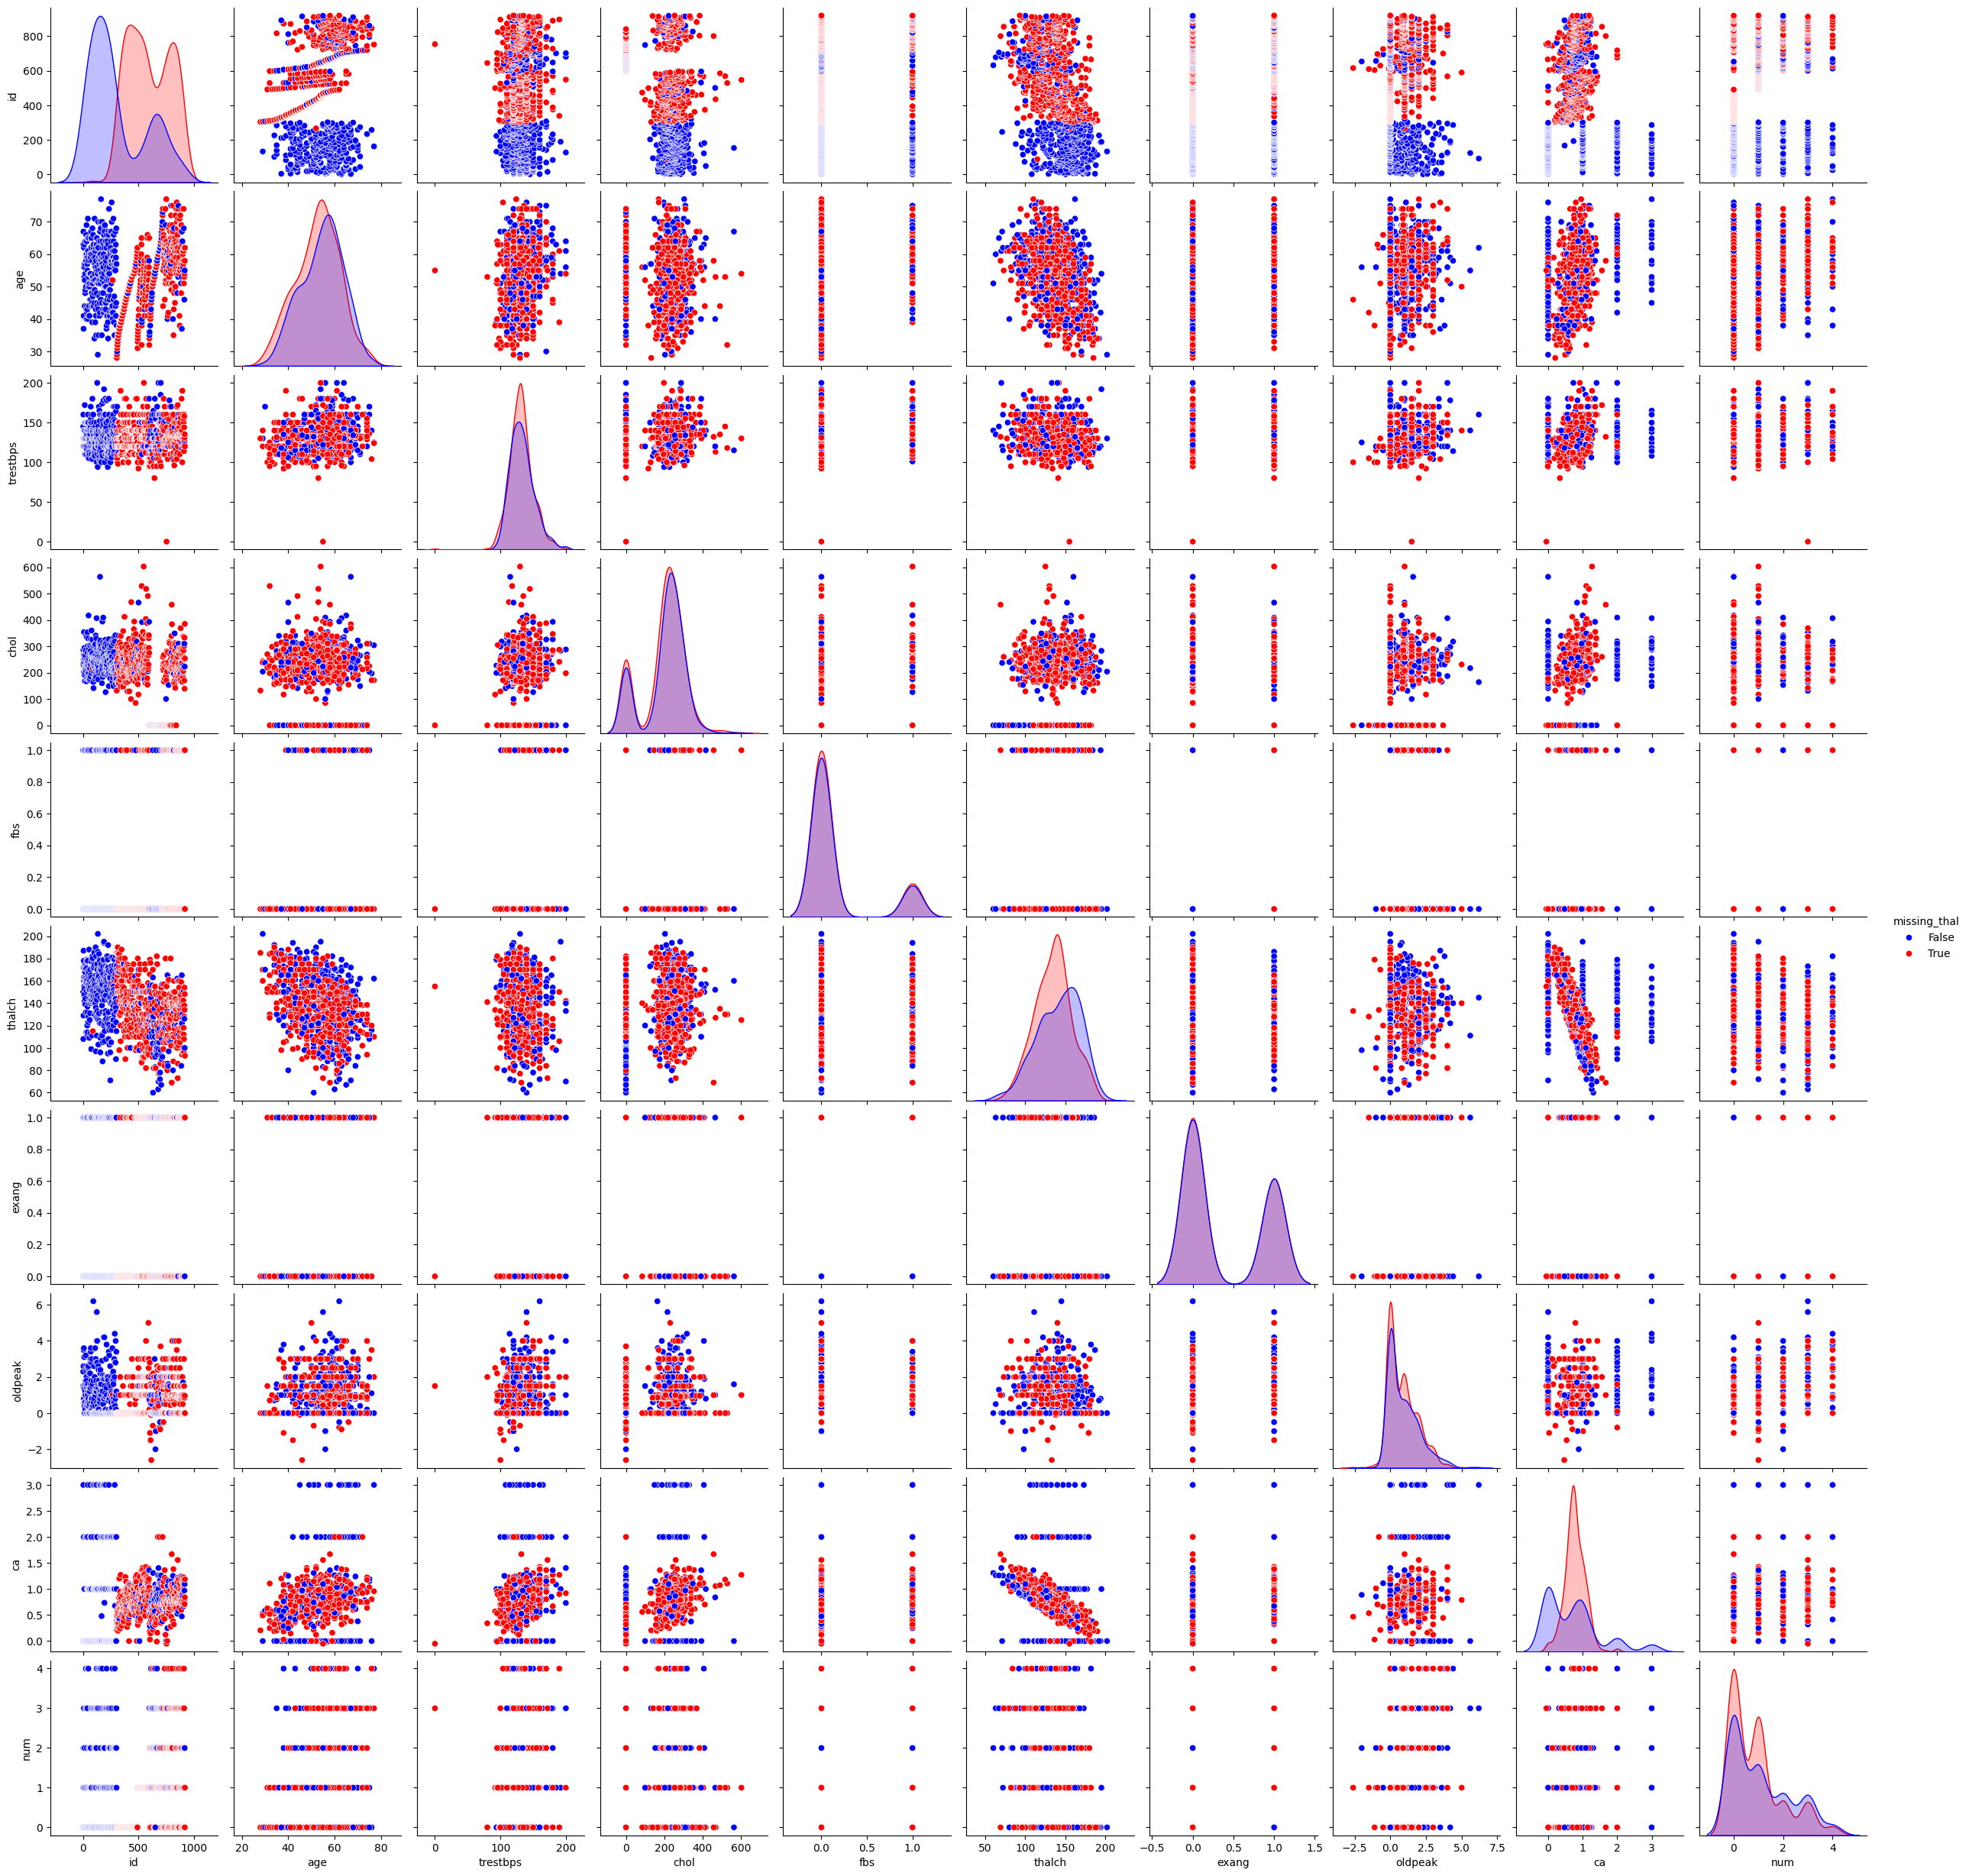

In [ ]:
#pair plot that highlights missingness in specific variables
missing_indicator = heart_disease_data['thal'].isnull()
sns.pairplot(heart_disease_data.assign(missing_thal=missing_indicator), hue='missing_thal', palette={True: 'red', False: 'blue'})
plt.show()

Since there are non-linear realtionaship and we need better accuracy for our models rather than the speed we will choose RandomForestClassifier to impute missing values in 'thal' column.

In [60]:
#define the function
def impute_missing_values_with_rf(heart_disease_data,column_name):
    heart_disease_data_copy = heart_disease_data.copy()

    #cheking the missing values
    if heart_disease_data_copy[column_name].isnull().sum()== 0:
        print(f'There is no missing values in "{column_name}" column')
        return heart_disease_data_copy
    print(f"Imputing missing values in column '{column_name}' with RandomForestClassifier...")

    #lable encode the target column
    le = LabelEncoder()
    heart_disease_data_copy[column_name]= heart_disease_data_copy[column_name].astype(str)
    heart_disease_data_copy[column_name] = heart_disease_data_copy[column_name].apply(lambda x: np.nan if x.lower() == 'nan' else x)

    # Separate rows with and without missing values in the target column
    data_with_non_null_values = heart_disease_data_copy[heart_disease_data_copy[column_name].notnull()]
    data_with_null_data = heart_disease_data_copy[heart_disease_data_copy[column_name].isnull()]

    if data_with_null_data.empty:
        print(f'There is no missing values in "{column_name}" column after preprocessing')
        return heart_disease_data_copy

    #Encode the target variable
    data_with_non_null_values[column_name] = le.fit_transform(data_with_non_null_values[column_name].astype(str))


    #define features (X) and target (y)
    X = data_with_non_null_values.drop(columns=[column_name])
    y = data_with_non_null_values[column_name]

    #one-hot encode the features
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Align features for the null_data set
    null_data_encoded = pd.get_dummies(data_with_null_data.drop(columns=[column_name]), drop_first=True)
    null_data_encoded = null_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    # Check for any data availability
    if null_data_encoded.empty:
        print("No matching features found between training data and null data for prediction.")
        return heart_disease_data_copy

    #Train RandomForestClassifier on non-bull value data
    rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
    rf_model.fit(X_encoded, y)

    # Predict missing values
    predicted_values = rf_model.predict(null_data_encoded)

    # Decode the predicted values back to the original labels
    decoded_values = le.inverse_transform(predicted_values)

    # Impute missing values in the original DataFrame
    heart_disease_data_copy.loc[heart_disease_data_copy[column_name].isnull(), column_name] = decoded_values

    print(f"Missing values in '{column_name}' have been imputed successfully.")
    return heart_disease_data_copy



In [62]:
#impute missing values on 'thal' variable
heart_disease_data = impute_missing_values_with_rf(heart_disease_data,'thal')


There is no missing values in "thal" column


Let's impute values for the other catergorical variables also.

exang

In [66]:
#impute missing values on 'exang' variable
heart_disease_data = impute_missing_values_with_rf(heart_disease_data,'exang')

There is no missing values in "exang" column


slope

In [68]:
#impute missing values on 'Slope' variable
heart_disease_data = impute_missing_values_with_rf(heart_disease_data,'slope')

There is no missing values in "slope" column


fbs

In [70]:
#impute missing values on 'fbs' variable
heart_disease_data = impute_missing_values_with_rf(heart_disease_data,'fbs')

There is no missing values in "fbs" column


restecg

In [72]:
#impute missing values on 'restecg' variable
heart_disease_data = impute_missing_values_with_rf(heart_disease_data,'restecg')

There is no missing values in "restecg" column


### *Verifying that not having missing values*

In [73]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        735 non-null    int64  
 1   age       735 non-null    int64  
 2   sex       735 non-null    object 
 3   dataset   735 non-null    object 
 4   cp        735 non-null    object 
 5   trestbps  735 non-null    float64
 6   chol      735 non-null    float64
 7   fbs       735 non-null    object 
 8   restecg   735 non-null    object 
 9   thalch    735 non-null    float64
 10  exang     735 non-null    object 
 11  oldpeak   735 non-null    float64
 12  slope     735 non-null    object 
 13  ca        735 non-null    float64
 14  thal      735 non-null    object 
 15  num       735 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 97.6+ KB


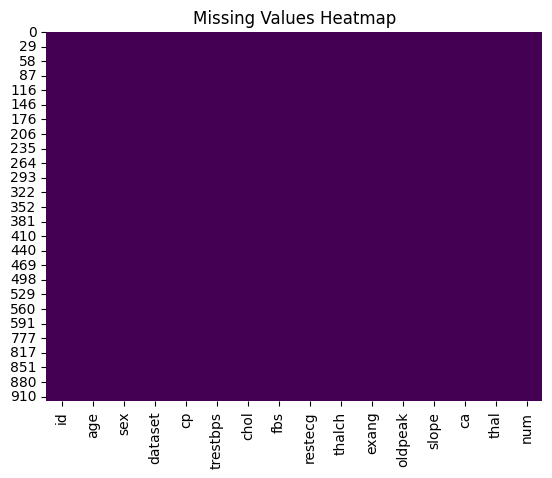

In [74]:
# Heatmap to visualize missing data
sns.heatmap(heart_disease_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [75]:
heart_disease_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Resting Blood Pressure (trestbps)**

The normal resting blood pressure is 120/80 mm Hg.



*   High BP (Hypertension): Can lead to heart disease, stroke.
*   Low BP (Hypotension): May cause dizziness, fainting.





In [76]:
heart_disease_data['trestbps'].min(), heart_disease_data['trestbps'].max()

(92.0, 180.0)

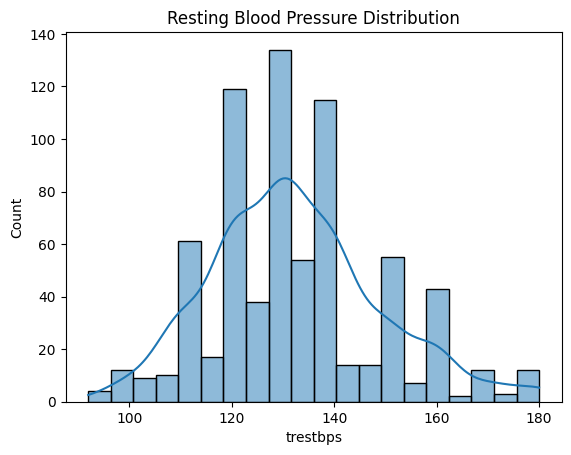

In [78]:
sns.histplot(heart_disease_data['trestbps'], kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.show()

In [77]:
heart_disease_data['trestbps'].value_counts().nlargest(5)

,count
trestbps,
120.0,109
130.0,100
140.0,90
150.0,49
110.0,47


Most of the people have Blood Pressure ranges from 110-150 mg Hg

**Chol Column**


The normal cholesterol level is less than 200 mg/dL.

In [ ]:
heart_disease_data['chol'].describe()

,chol
count,909.000000
mean,198.206546
std,106.971814
min,0.000000
25%,175.000000
50%,222.000000
75%,266.000000
max,518.000000


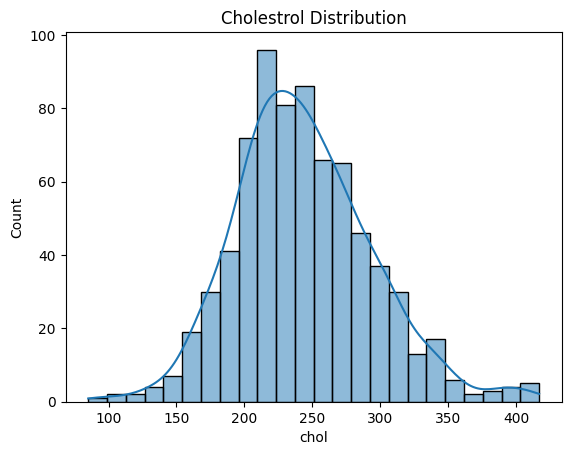

In [80]:
#plot the chol column
sns.histplot(heart_disease_data['chol'], kde=True)
plt.title('Cholestrol Distribution')
plt.show()

 The majority of the patients have cholesterol levels between 200-300 mg/dl. It is slightly higher than the normal range.

In [81]:
#Age Column binning
heart_disease_data['age-bins'] = pd.cut(heart_disease_data['age'], bins=[0, 30, 40, 50, 60, 70, 80], labels=['0-30','31-40', '41-50', '51-60', '61-70', '71-80'])


In [82]:
heart_disease_data['age-bins'].value_counts()

,count
age-bins,
51-60,298
41-50,201
61-70,138
31-40,73
71-80,20
0-30,5


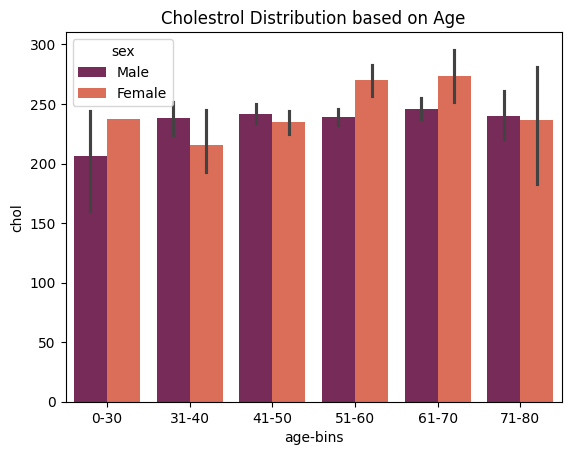

In [83]:
sns.barplot(data=heart_disease_data, x='age-bins',y='chol', hue='sex', palette='rocket')
plt.title('Cholestrol Distribution based on Age')
plt.show()


The cholesterol level is highest among the age group of 61-70 years.

**FBS Column**


fbs column tells us about the fasting blood sugar levels of the patients.

In [84]:
heart_disease_data['fbs'].value_counts()

,count
fbs,
False,617
True,118


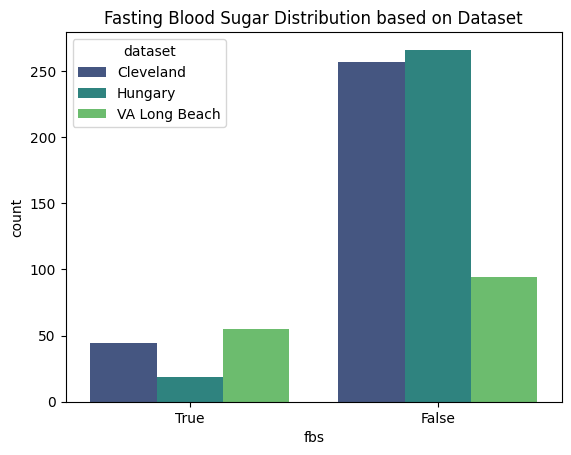

In [85]:
sns.countplot(data=heart_disease_data, x='fbs', hue='dataset', palette='viridis')
plt.title('Fasting Blood Sugar Distribution based on Dataset')
plt.show()

The majority of the patients have fasting blood sugar levels less than 120 mg/dl.

**Restecg Column**

resting electrocardiographic results

In [86]:
heart_disease_data['restecg'].value_counts()

,count
restecg,
normal,437
lv hypertrophy,172
st-t abnormality,126




*   **Normal**:A healthy ECG reading with no signs of heart problems.


*   **LV Hypertrophy**: Thickening of the heart's left side, which can happen when the heart works too hard.

*  **ST-T Abnormality**: Unusual patterns in part of the ECG that may point to heart issues like reduced blood flow or heart attack.




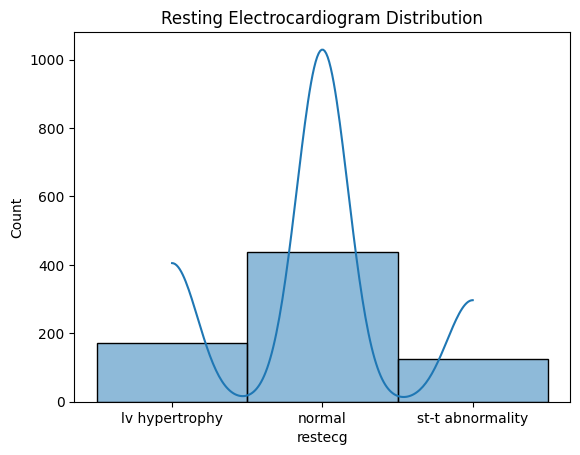

In [87]:
sns.histplot(heart_disease_data['restecg'], kde=True)
plt.title('Resting Electrocardiogram Distribution')
plt.show()

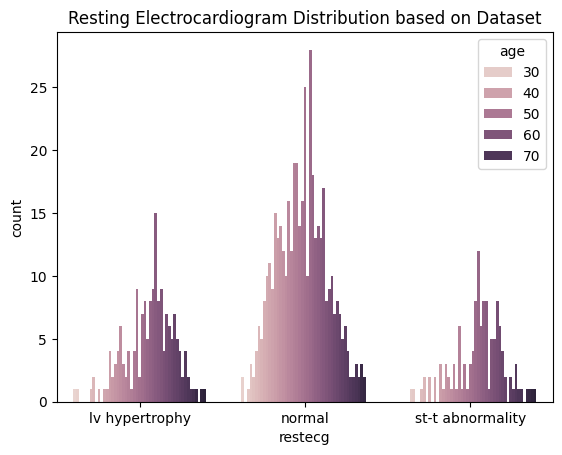

In [88]:
sns.countplot(data=heart_disease_data, x='restecg', hue='age')
plt.title('Resting Electrocardiogram Distribution based on Dataset')
plt.show()

In [89]:
fig = px.histogram(heart_disease_data, x='age-bins', color='restecg', barmode='group', title='Resting ECG Results Based on Gender')
fig.show()

According to our dataset, majority of the patients have normal Resting ECG

**Thalch Column**

In [90]:
heart_disease_data['thalch'].value_counts().nlargest(5)

,count
thalch,
150.0,38
140.0,37
130.0,24
160.0,24
120.0,21


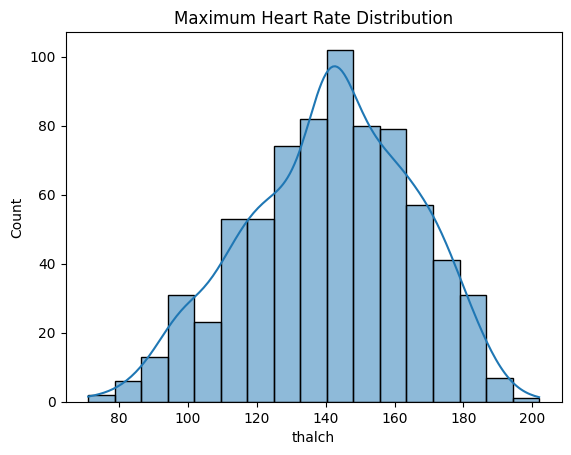

In [91]:
sns.histplot(heart_disease_data['thalch'], kde=True)
plt.title('Maximum Heart Rate Distribution')
plt.show()

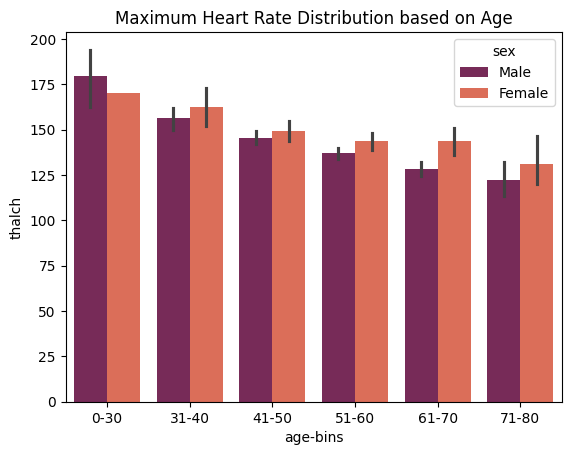

In [92]:
sns.barplot(data=heart_disease_data, x='age-bins',y='thalch', hue='sex', palette='rocket')
plt.title('Maximum Heart Rate Distribution based on Age')
plt.show()

The young age group has a higher heart rate as compared to the older age group.

**Exang Column**

This Column indicates whether a person experiences angina (chest pain) during physical exertion.






True: The individual experiences angina when exercising. False: The
individual does not experience angina when exercising.

In [93]:
heart_disease_data['exang'].value_counts()

,count
exang,
False,452
True,283


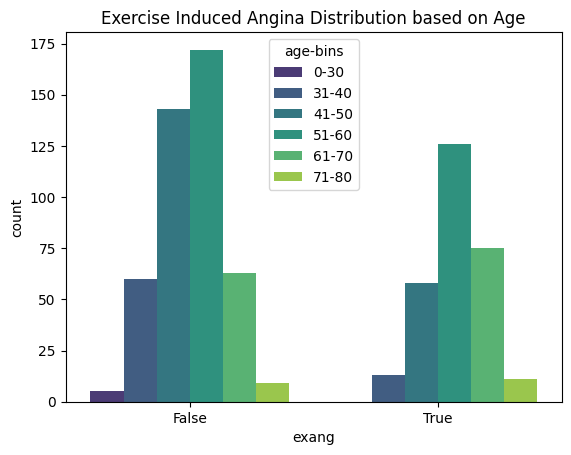

In [94]:
sns.countplot(data=heart_disease_data, x='exang', hue='age-bins', palette='viridis')
plt.title('Exercise Induced Angina Distribution based on Age')
plt.show()

According to  dataset, the majority of the patients does not experience angina during physical exertion but age group 51-60 has the highest number of patients who experience angina during physical exertion.

**Oldpeak Column**

1. It indicates how much the ST segment falls below the baseline during exercise.


2.   A higher oldpeak value suggests more
significant ST depression, which can indicate myocardial ischemia (reduced blood flow to the heart).

In [95]:
heart_disease_data['oldpeak'].value_counts().nlargest(5)

,count
oldpeak,
0.0,313
1.0,64
2.0,56
1.5,34
3.0,23





*   0: No ST depression (normal, healthy heart response).

*   0 to 1 mm: Mild ST depression, usually not concerning but can be observed in some cases.


*   Greater than 1 mm: Clinically significant ST depression



In [96]:
heart_disease_data.groupby('age-bins')['oldpeak'].mean().sort_values(ascending=False)

<ipython-input-96-ac15d517dd54>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,oldpeak
age-bins,
61-70,1.323981
71-80,1.217131
51-60,0.958429
41-50,0.624857
31-40,0.484448
0-30,0.000000


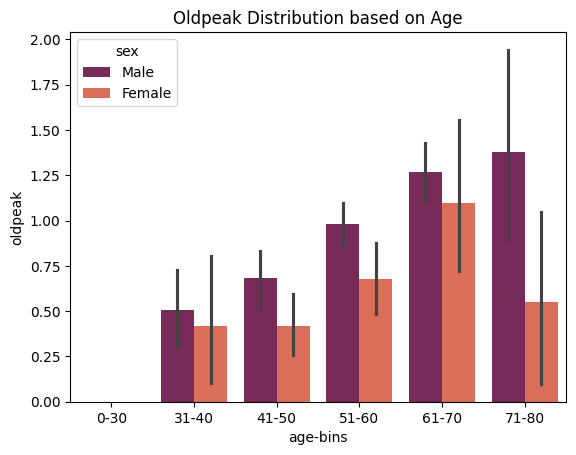

In [ ]:
sns.barplot(data=heart_disease_data, x='age-bins',y='oldpeak', hue='sex', palette='rocket')
plt.title('Oldpeak Distribution based on Age')
plt.show()

This shows that :



1.   ST depression (oldpeak) rises with age, higher risk of heart issues in older age groups.
2.   Males have higher oldpeak values as compared to Femlaes.



**Slope**

In [ ]:
heart_disease_data['slope'].value_counts()

,count
slope,
flat,524
upsloping,322
downsloping,63


In [ ]:
heart_disease_data.groupby('age-bins')['slope'].value_counts()

<ipython-input-75-7af2cdc0b3ad>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



age-bins  slope      
0-30      upsloping        5
          downsloping      0
          flat             0
31-40     upsloping       50
          flat            34
          downsloping      2
41-50     flat           114
          upsloping      102
          downsloping      8
51-60     flat           233
          upsloping      119
          downsloping     25
61-70     flat           131
          upsloping       38
          downsloping     24
71-80     flat            12
          upsloping        8
          downsloping      4
Name: count, dtype: int64

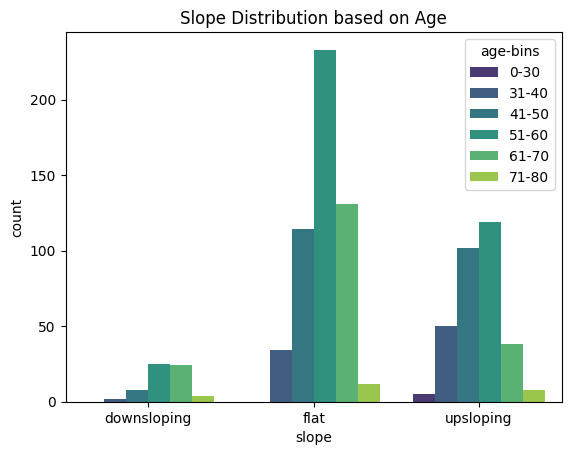

In [ ]:
sns.countplot(data=heart_disease_data, x='slope', hue='age-bins', palette='viridis')
plt.title('Slope Distribution based on Age')
plt.show()





*  Younger Age Groups (0-40): Healthier heart responses.


*   Middle Age Groups (41-60): Higher counts of flat slopes





*   Older Age Groups (61-80): A mix of slopes, with a notable presence of downsloping indicating a concerning trend toward severe heart conditions.


**CA(number of major vessels (0-3) colored by fluoroscopy)**

In [ ]:
heart_disease_data['ca'].value_counts()

,count
ca,
0.000000,180
1.000000,66
2.000000,40
3.000000,20
0.636749,10
...,...
0.390908,1
0.472641,1
0.568991,1


In [ ]:
heart_disease_data.groupby(['age-bins','sex'])['ca'].count().reset_index()

<ipython-input-78-1eea2380650a>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,age-bins,sex,ca
0,0-30,Female,1
1,0-30,Male,4
2,31-40,Female,19
3,31-40,Male,67
4,41-50,Female,59
5,41-50,Male,165
6,51-60,Female,69
7,51-60,Male,308
8,61-70,Female,37
9,61-70,Male,156


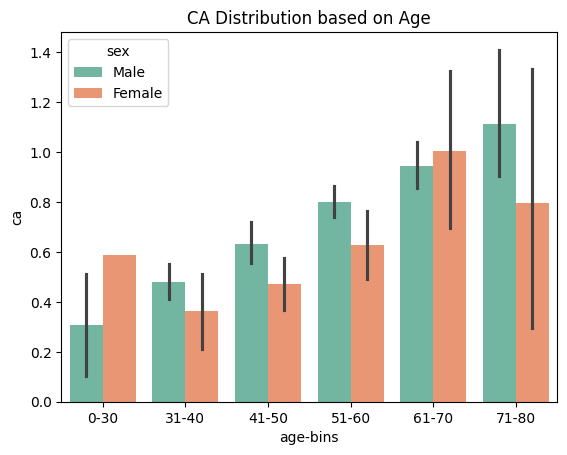

In [ ]:
sns.barplot(data=heart_disease_data, x='age-bins',y='ca', hue='sex', palette='Set2')
plt.title('CA Distribution based on Age')
plt.show()



*   Males show more affected vessels across all age bins.
*   Significant rise in affected vessels with age, especially in males aged 51-60 .






**Thal column**

Describes the results of a thallium stress test

In [ ]:
heart_disease_data['thal'].value_counts()

,count
thal,
reversable defect,517
normal,321
fixed defect,71


In [ ]:
heart_disease_data.groupby(['age-bins','sex'])['thal'].size().reset_index()

<ipython-input-81-0878024b9db2>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,age-bins,sex,thal
0,0-30,Female,1
1,0-30,Male,4
2,31-40,Female,19
3,31-40,Male,67
4,41-50,Female,59
5,41-50,Male,165
6,51-60,Female,69
7,51-60,Male,308
8,61-70,Female,37
9,61-70,Male,156


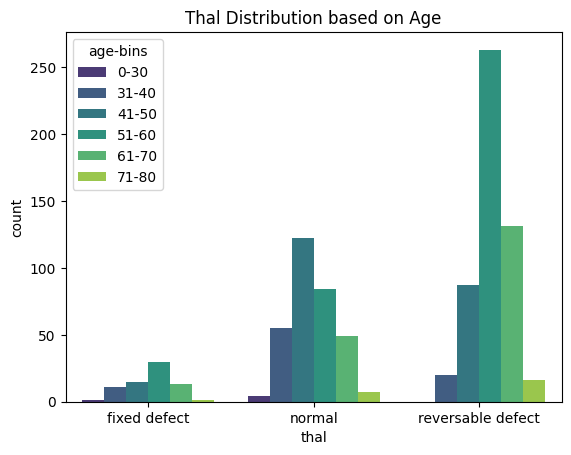

In [ ]:
sns.countplot(data=heart_disease_data, x='thal', hue='age-bins', palette='viridis')
plt.title('Thal Distribution based on Age')
plt.show()



*   Very few cases (1 female, 4 males) in 0-30 age group, indicating low heart disease risk.
*   In 41-50 age group, especially in males (143 cases), indicating higher risk.
*   Females show lower counts all age bins.
*   Highest count in 51-60 age group (231 males).





**Num Column**

In [ ]:
heart_disease_data['num'].value_counts()

,count
num,
0,409
1,261
2,109
3,103
4,27


0 = no heart disease
1 = mild heart disease
2 = moderate heart disease
3 = severe heart disease
4 = critical heart disease

In [ ]:
heart_disease_data.groupby(['age-bins','sex','num']).size().reset_index(name='count')

<ipython-input-84-e12fb561a9a3>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,age-bins,sex,num,count
0,0-30,Female,0,1
1,0-30,Female,1,0
2,0-30,Female,2,0
3,0-30,Female,3,0
4,0-30,Female,4,0
5,0-30,Male,0,4
6,0-30,Male,1,0
7,0-30,Male,2,0
8,0-30,Male,3,0
9,0-30,Male,4,0


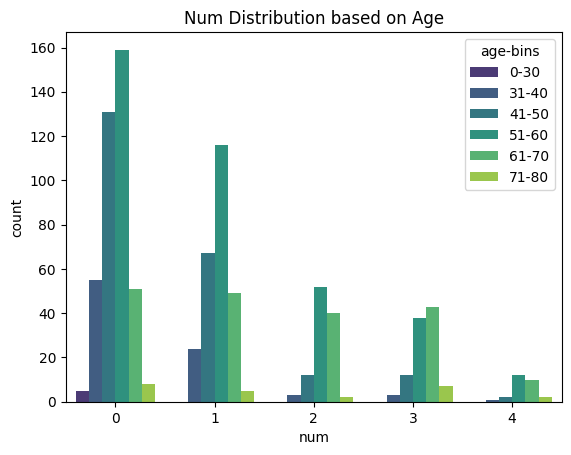

In [ ]:
sns.countplot(data=heart_disease_data, x='num', hue='age-bins', palette='viridis')
plt.title('Num Distribution based on Age')
plt.show()

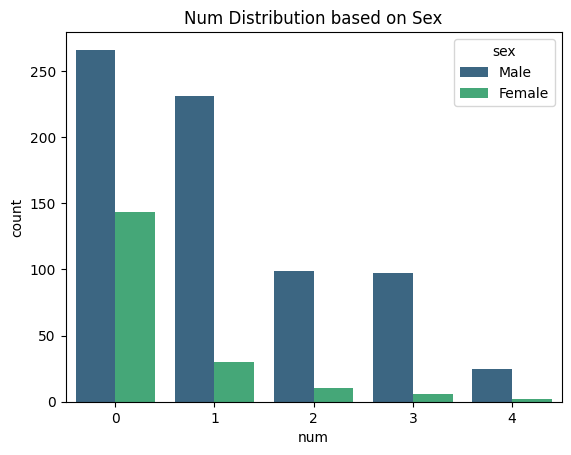

In [ ]:
sns.countplot(data=heart_disease_data, x='num', hue='sex', palette='viridis')
plt.title('Num Distribution based on Sex')
plt.show()

Observations of the EDA :



*   In the 0-30 age group there are minimum heart disease predictions are shown.
*   In the 51-60 and 61-70 age group for males higher predictions risks have happen.
*   Female are shown fewer heart disease cases in overall.






Let's drop id and age-bins columns from the dataset

In [116]:
#drop the id and age-bins columns
heart_disease_data = heart_disease_data.drop(columns=['id','age-bins'], axis=1)

In [117]:
heart_disease_data.head(2)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2


## Encoding the dataset

In [119]:
#encode the dataset using the onehot encoding
heart_disease_data = pd.get_dummies(heart_disease_data, columns=['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

In [120]:
heart_disease_data.head()

,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Female,sex_Male,dataset_Cleveland,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,0,False,True,True,...,False,False,True,False,True,False,False,True,False,False
1,67,160.0,286.0,108.0,1.5,3.0,2,False,True,True,...,False,False,False,True,False,True,False,False,True,False
2,67,120.0,229.0,129.0,2.6,2.0,1,False,True,True,...,False,False,False,True,False,True,False,False,False,True
3,37,130.0,250.0,187.0,3.5,0.0,0,False,True,True,...,True,False,True,False,True,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0.0,0,True,False,True,...,False,False,True,False,False,False,True,False,True,False


So, then will look at the machine learnign models for the predictions.



---



# Machine Learning Model

In [121]:
heart_disease_data.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_VA Long Beach', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'fbs_False', 'fbs_True',
       'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality',
       'exang_False', 'exang_True', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [122]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 919
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       735 non-null    int64  
 1   trestbps                  735 non-null    float64
 2   chol                      735 non-null    float64
 3   thalch                    735 non-null    float64
 4   oldpeak                   735 non-null    float64
 5   ca                        735 non-null    float64
 6   num                       735 non-null    int64  
 7   sex_Female                735 non-null    bool   
 8   sex_Male                  735 non-null    bool   
 9   dataset_Cleveland         735 non-null    bool   
 10  dataset_Hungary           735 non-null    bool   
 11  dataset_VA Long Beach     735 non-null    bool   
 12  cp_asymptomatic           735 non-null    bool   
 13  cp_atypical angina        735 non-null    bool   
 14  cp_non-anginal 

In [123]:
heart_disease_data['num'].value_counts()

,count
num,
0,387
1,196
3,68
2,63
4,21


The Target Column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.

*   0 = no heart disease
*   1 = mild heart disease
*   2 = moderate heart disease
*   3 = severe heart disease
*   4 = critical heart disease

For this project, we will convert the num column into a binary classification problem. We will consider the following values:

*   0 = no heart disease
*   1 = heart disease

It will make easy a model to predict the heart disease.

In [124]:
# Split the data into X and y
X = heart_disease_data.drop(['num'], axis=1)
y = heart_disease_data['num']

In [125]:
#target engineering on num
y = np.where((y == 1) | (y == 2) | (y == 3) | (y == 4), 1,0)

In [127]:
X.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False
1,67,160.0,286.0,108.0,1.5,3.0,False,True,True,False,...,False,False,False,True,False,True,False,False,True,False
2,67,120.0,229.0,129.0,2.6,2.0,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
3,37,130.0,250.0,187.0,3.5,0.0,False,True,True,False,...,True,False,True,False,True,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0.0,True,False,True,False,...,False,False,True,False,False,False,True,False,True,False


In [131]:
y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,

In [ ]:
# List of columns to encode
#categorical_columns_to_encode = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
le = LabelEncoder()
# Initialize label encoder and apply encoding
le_dict = {}
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])
        le_dict[col] = le
    else:
      pass
    # X_train[col] = le.fit_transform(X_train[col])
    # X_test[col] = le.transform(X_test[col])
    # le_dict[col] = le  # Save the label encoder for potential inverse transformation later

In [ ]:
# Scale numeric  data
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


NameError: name 'numerical_columns' is not defined

In [ ]:
#plot all numeric columns
plt.figure(figsize=(18, 18))
for  col in numerical_columns:
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

NameError: name 'numerical_columns' is not defined

In [132]:
#split the data into train, test and split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [133]:
X_train.shape, X_test.shape

((477, 28), (258, 28))

In this dataset num, which represents the presence of heart disease. It is usually encoded as:


*  0: No heart disease
*  1, 2, 3, 4: Different degrees of heart disease.


 It a multi-class classification problem.



---

However, I  simplified it to:


*   0: No heart disease
*   1: Presence of heart disease


---




In this simplified form, it becomes a binary classification problem.

The following models will be used to predict the heart disease:


*   Logistic Regression Model
*   Random Forest
*   Decision Tree


*   K-Nearest Neighbors(KNN)


*   Support Vecctor Machine(SVM)


*   XGBoost








In [134]:
#Dictionary to Store Accuracies
model_accuracies = {}

## Model Training

### Logistic Regression Model

In [165]:
print("\nTraining Logistic Regression")
try:
  logistic_model = LogisticRegression(random_state=42 , max_iter=500)
  logistic_model.fit(X_train, y_train)
  y_pred = logistic_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  model_accuracies['Logistic Regression'] = accuracy
  print(f"Logistic Regression Accuracy: {accuracy:.4f}")
  print(classification_report(y_test, y_pred))
except Exception as e:
  print(f"An error occurred: {e}")



Training Logistic Regression
Logistic Regression Accuracy: 0.8178
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       140
           1       0.78      0.83      0.81       118

    accuracy                           0.82       258
   macro avg       0.82      0.82      0.82       258
weighted avg       0.82      0.82      0.82       258



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Random Forest

In [157]:
print("\nTraining Random Forest...")
try:
    rfmodel = RandomForestClassifier(random_state=42)
    rfmodel.fit(X_train, y_train)
    y_pred = rfmodel.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies['Random Forest']  = acc
    print(f"Random Forest Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
except Exception as e:
    print(f"Error training Random Forest: {e}")


Training Random Forest...
Random Forest Accuracy: 0.8450
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       140
           1       0.81      0.86      0.83       118

    accuracy                           0.84       258
   macro avg       0.84      0.85      0.84       258
weighted avg       0.85      0.84      0.85       258



### Decision Tree

In [158]:
print("\nTraining Decision Tree...")
try:
    dtmodel = DecisionTreeClassifier(max_depth=5, min_samples_split=10,random_state=42)
    dtmodel.fit(X_train, y_train)
    y_pred = dtmodel.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies['Decision Tree'] = acc
    print(f"Decision Tree Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
except Exception as e:
    print(f"Error training Decision Tree: {e}")


Training Decision Tree...
Decision Tree Accuracy: 0.7868
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       140
           1       0.77      0.75      0.76       118

    accuracy                           0.79       258
   macro avg       0.79      0.78      0.78       258
weighted avg       0.79      0.79      0.79       258



### K-Nearest Neighbors

In [159]:
print("\nTraining K-Nearest Neighbors...")
try:
    KNNmodel = KNeighborsClassifier()
    KNNmodel.fit(X_train, y_train)
    y_pred = KNNmodel.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies['K-Nearest Neighbors'] = acc
    print(f"K-Nearest Neighbors Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
except Exception as e:
    print(f"Error training K-Nearest Neighbors: {e}")


Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.6512
              precision    recall  f1-score   support

           0       0.69      0.64      0.67       140
           1       0.61      0.66      0.63       118

    accuracy                           0.65       258
   macro avg       0.65      0.65      0.65       258
weighted avg       0.65      0.65      0.65       258



### Support Vector Machine

In [160]:
print("\nTraining Support Vector Machine...")
try:
    svm_model = SVC(probability=True, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies['Support Vector Machine'] = acc
    print(f"Support Vector Machine Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
except Exception as e:
    print(f"Error training Support Vector Machine: {e}")


Training Support Vector Machine...
Support Vector Machine Accuracy: 0.6395
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       140
           1       0.61      0.58      0.60       118

    accuracy                           0.64       258
   macro avg       0.64      0.64      0.64       258
weighted avg       0.64      0.64      0.64       258



### XGBoost Classifier

In [161]:
print("\nTraining XGBoost Classifier")
try:
  xg_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
    )
  xg_model.fit(X_train, y_train)
  y_pred = xg_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  model_accuracies['XGBoost'] = accuracy
  print(f"XGBoost Accuracy: {accuracy:.4f}")
  print(classification_report(y_test, y_pred))
except Exception as e:
  print(f"An error occurred: {e}")


Training XGBoost Classifier
XGBoost Accuracy: 0.8140
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       140
           1       0.78      0.83      0.80       118

    accuracy                           0.81       258
   macro avg       0.81      0.82      0.81       258
weighted avg       0.82      0.81      0.81       258



In [162]:
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

print(f"Best Model: {best_model}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Best Model: Random Forest
Best Accuracy: 0.8450


Sort Accuracies in Ascending Order

In [163]:
sorted_accuracies = sorted(model_accuracies.items(), key=lambda item: item[1])
print("\nModel Accuracies (Ascending Order):")
for model, accuracy in sorted_accuracies:
  print(f"{model}: {accuracy:.4f}")


Model Accuracies (Ascending Order):
Support Vector Machine: 0.6395
K-Nearest Neighbors: 0.6512
Decision Tree: 0.7868
XGBoost: 0.8140
Logistic Regression: 0.8178
Random Forest: 0.8450


## Hyperparameter Tuning

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [50, 100, 150],
     'criterion': ['gini', 'entropy'],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print(f"Best Random Forest Parameters: {grid_rf.best_params_}")

Best Random Forest Parameters: {'criterion': 'entropy', 'n_estimators': 150}


In [164]:
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Random Forest Accuracy: {accuracy:.4f}")

Best Random Forest Accuracy: 0.8450


In [172]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble of the top 3 models
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', best_rf),
    ('Logistic Regression', logistic_model),
], voting='soft')

# Train the ensemble
ensemble_model.fit(X_train, y_train)

# Evaluate ensemble accuracy
ensemble_accuracy = ensemble_model.score(X_test, y_test)
print(f"Ensemble Model Test Accuracy: {ensemble_accuracy:.4f}")

Ensemble Model Test Accuracy: 0.8256


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [173]:
# Evaluate individual models
rf_acc = best_rf.score(X_test, y_test)
logistic_acc = logistic_model.score(X_test, y_test)

# Print individual model accuracies
print(f"Logistic Regression Accuracy: {logistic_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

Logistic Regression Accuracy: 0.8178
Random Forest Accuracy: 0.8450
Ensemble Model Accuracy: 0.8256


In [174]:
best_rf.score(X_test, y_test)

0.8449612403100775

In [ ]:
import pickle
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

NameError: name 'stacking_model' is not defined